In [386]:
import h5py
import numpy

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

vmaxleft = 1.5
vmaxcenter = 0.05
vscaleright = 2e-4

In [387]:
with h5py.File('reference.mat','r') as f:
    reference = f['reference']['real'] + 1j * f['reference']['imag'] 

In [388]:
with h5py.File('invicosa72orig.mat','r') as f:    
    rs = numpy.sqrt(numpy.clip(numpy.fft.fftshift(f['rs'][0:256,0:256]), 0, 1000))
    vs = numpy.sqrt(numpy.clip(numpy.fft.fftshift(f['vs'][0:256,0:256]),0,1000))
    vsfull = vs * 0    
    
    for i in range(0,50):
        vsfull = vsfull + numpy.sqrt(numpy.clip(numpy.fft.fftshift(f['vs'][(i*256+0):(i*256+256),0:256]),0,1000))
    vsfull = vsfull / 50
    f2 = numpy.sqrt(numpy.fft.fftshift(numpy.reshape(f['f2'][:],(256,256))))

In [389]:
with h5py.File('vs72short.h5','r') as f:
    mosaic = abs(f['mosaic'][:])
    vs72rsum = f['r_sum'][:] / 50
    vs72R = f['R'][:]
    vsrsum = f['r_sumvs'][:] / 50
    vsR = f['Rvs'][:]

In [390]:
with h5py.File('rs72f2short.h5','r') as f:
    rs72rsum = f['r_sum'][:] / 50
    rs72R = f['R'][:]

In [391]:
with h5py.File('superimages.mat','r') as f:    
    rs_s = f['rs72f2super']['r'][:] + 1j * f['rs72f2super']['i'][:]
    vs_s = f['vs72super']['r'][:] +1j * f['vs72super']['i'][:]

In [392]:
rs_s_fft = numpy.fft.fftshift(numpy.fft.fft2(rs_s[0,:,:]))
vs_s_fft = numpy.fft.fftshift(numpy.fft.fft2(vs_s[0,:,:]))
ref_fft = numpy.fft.fftshift(numpy.fft.fft2(reference))*f2/65536 

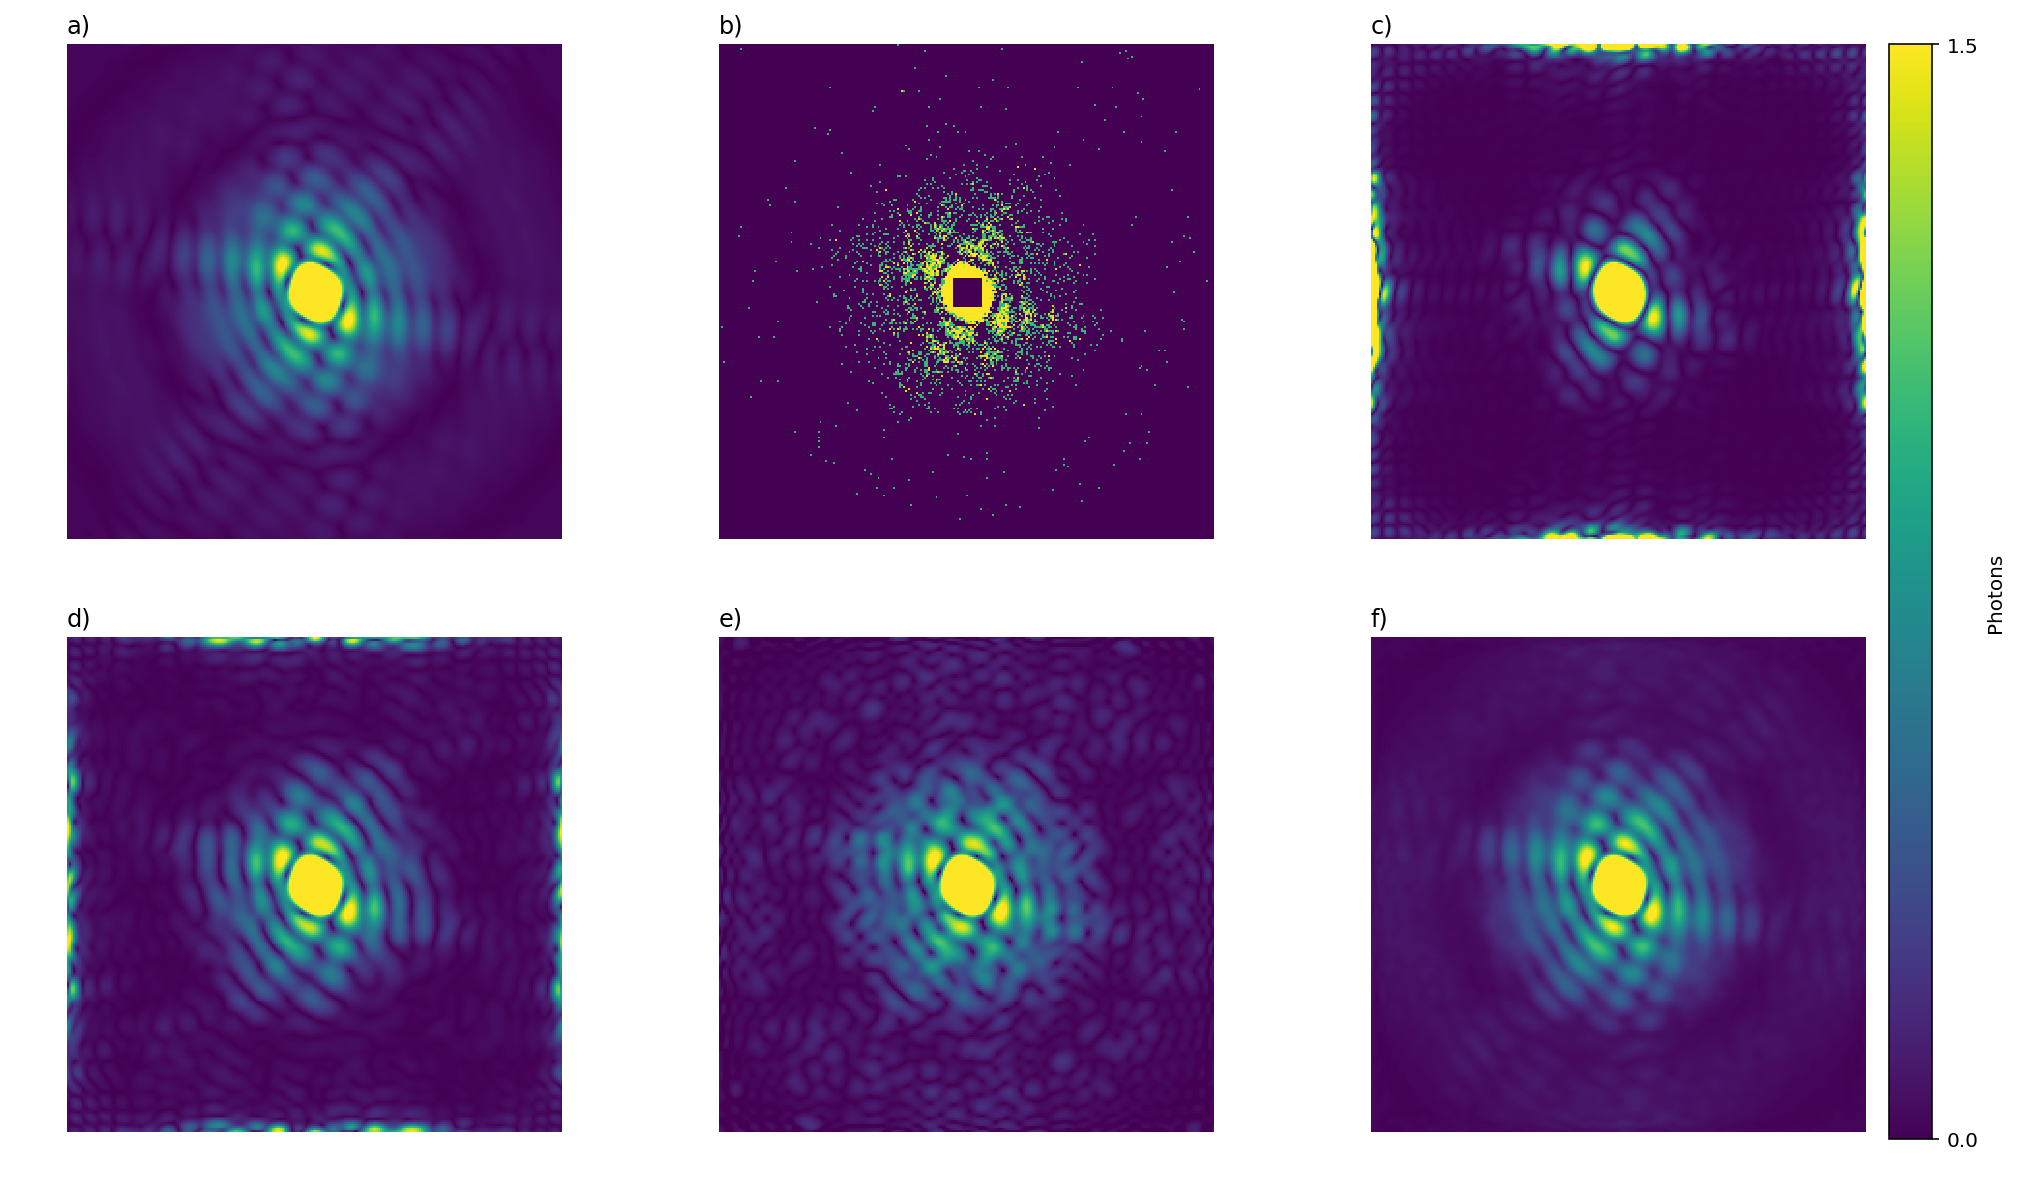

In [433]:
fig = plt.figure(figsize=(15,10))

fig.subplots_adjust(right=0.98)

ax = fig.add_subplot(231)
im = ax.imshow(abs(ref_fft*4)/f2, vmax=vmaxleft, vmin= 0, interpolation='Nearest')
plt.axis('off')
plt.title('a)', loc='left')

cax = divider.append_axes('bottom', size='5%', pad='-5%', add_to_figure=True)
cbar = fig.colorbar(im, cax = cax, orientation='horizontal', ticks = [0, vmaxleft])
cbar.set_label('Photons')

ax = fig.add_subplot(232)
ax.imshow(rs, vmax = vmaxleft, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('b)', loc='left')

ax = fig.add_subplot(233)
ax.imshow(numpy.abs(rs_s_fft)/f2, vmax = vmaxleft, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('c)', loc='left')

ax = fig.add_subplot(234)
ax.imshow(numpy.abs(vs_s_fft)/f2, vmax = vmaxleft, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('d)', loc='left')

ax = fig.add_subplot(235)
ax.imshow(abs(vs)/f2, vmax=vmaxleft, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('e)', loc='left')

ax = fig.add_subplot(236)
ax.imshow(abs(vsfull)/f2, vmax=vmaxleft, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('f)', loc='left')

cbar_ax = fig.add_axes([0.98, 0.12, 0.02, 0.76])
cbar = fig.colorbar(im, cax=cbar_ax, ticks = [0, vmaxleft])
cbar.set_label('Photons')


plt.savefig('reconfigure.pdf', bbox_inches='tight')


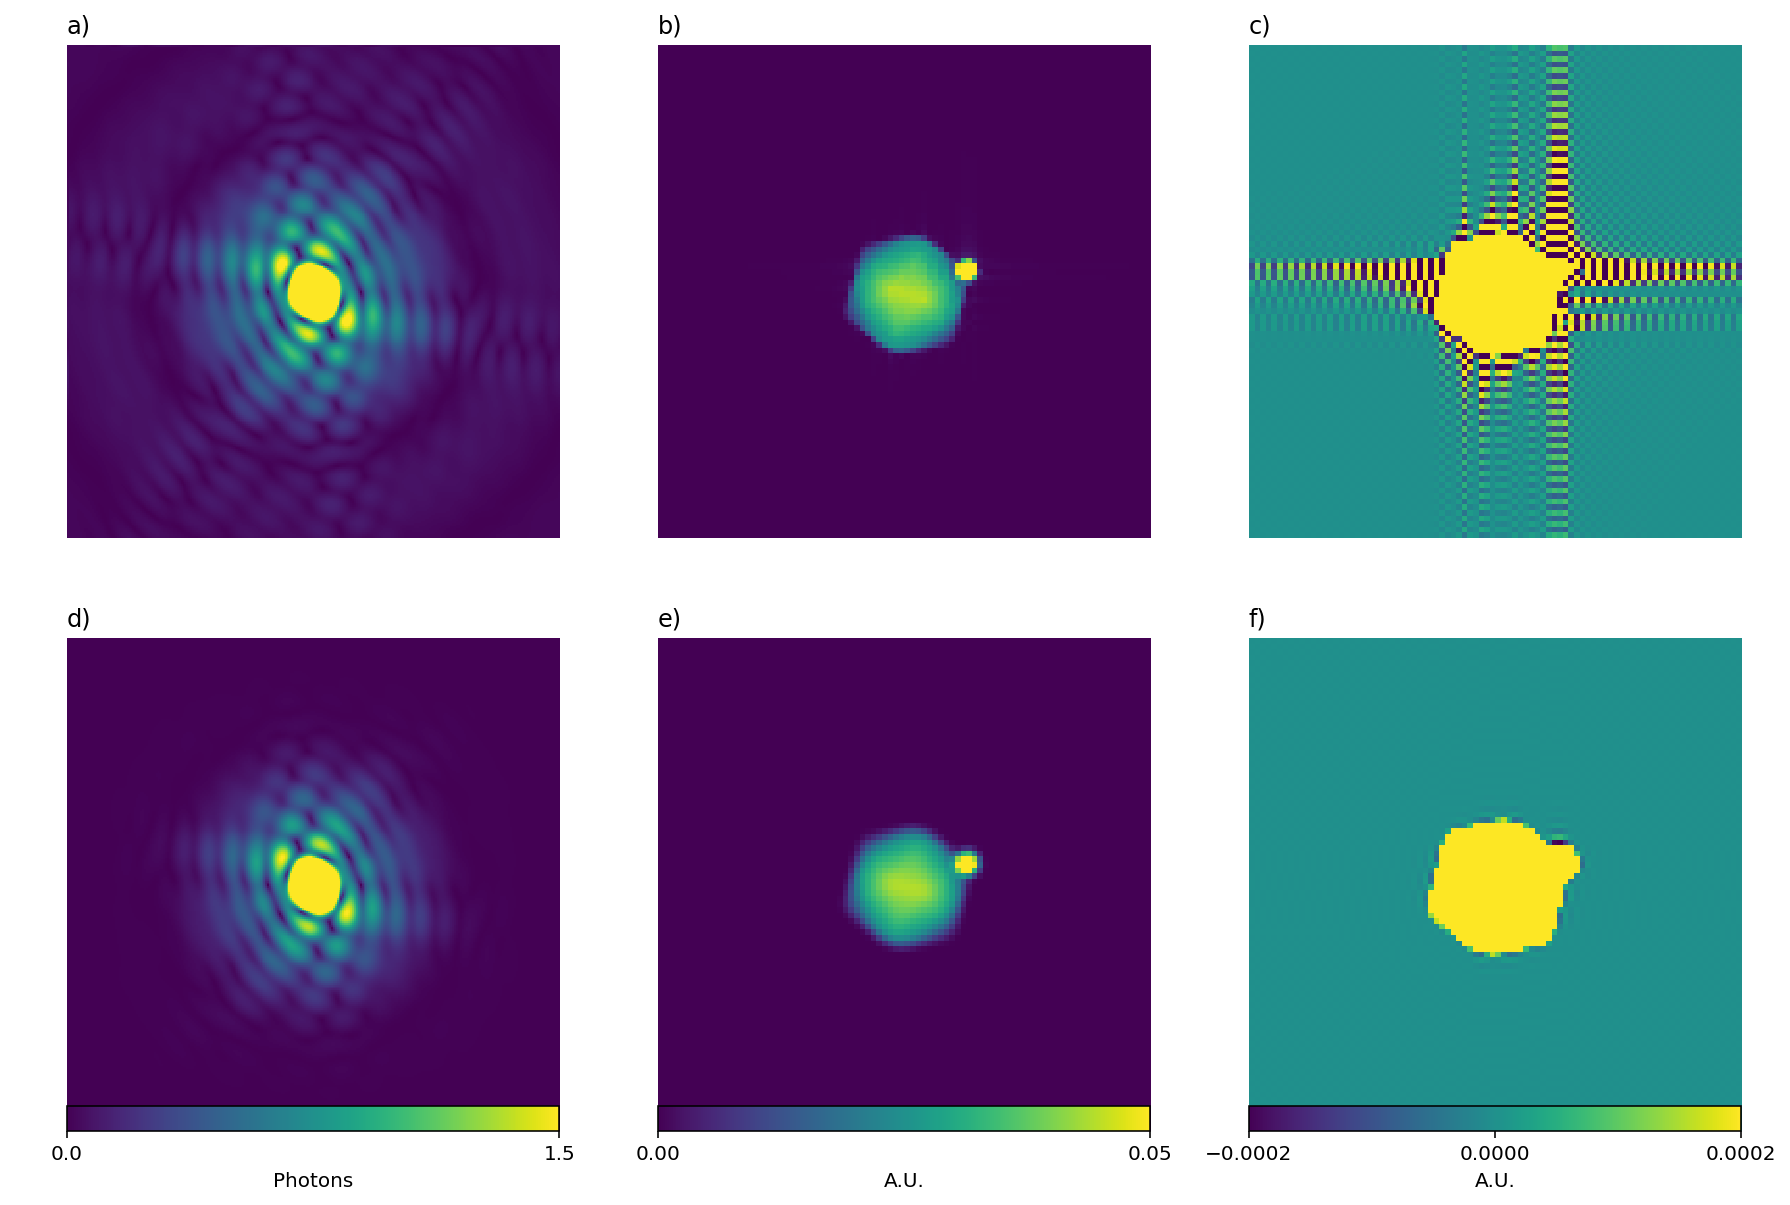

In [403]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(231)
ax.imshow(abs(ref_fft*4)/f2, vmax = vmaxleft, vmin = 0)
plt.axis('off')
plt.title('a)', loc='left')

ax = fig.add_subplot(232)
ax.imshow(numpy.abs(numpy.fft.fft2(numpy.fft.fftshift(ref_fft*4/f2)))[84:172,84:172] / 65536, vmax = vmaxcenter, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('b)', loc='left')

ax = fig.add_subplot(233)
ax.imshow(numpy.real(numpy.fft.fft2(numpy.fft.fftshift(ref_fft*4/f2)))[84:172,84:172]/65536, vmax = vscaleright, vmin = -vscaleright, interpolation='Nearest')
plt.axis('off')
plt.title('c)', loc='left')

ax = fig.add_subplot(234)
im = ax.imshow(abs(ref_fft*4), vmax = vmaxleft, vmin = 0, interpolation='Nearest')
plt.title('d)', loc='left')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad='-5%', add_to_figure=True)
cbar = fig.colorbar(im, cax = cax, orientation='horizontal', ticks = [0, vmaxleft])
cbar.set_label('Photons')


ax = fig.add_subplot(235)
im = ax.imshow(numpy.abs(numpy.fft.fft2(numpy.fft.fftshift(ref_fft*4)))[84:172,84:172]/65536, vmax = vmaxcenter, vmin = 0, interpolation='Nearest')
plt.axis('off')
plt.title('e)', loc='left')
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad='-5%', add_to_figure=True)
cbar = fig.colorbar(im, cax = cax, orientation='horizontal', ticks = [0, vmaxcenter])
cbar.set_label('A.U.')


ax = fig.add_subplot(236)
im = ax.imshow(numpy.real(numpy.fft.fft2(numpy.fft.fftshift(ref_fft*4)))[84:172,84:172]/65536, vmax = vscaleright, vmin = -vscaleright, interpolation='Nearest')
plt.axis('off')
plt.title('f)', loc='left')
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad='-5%', add_to_figure=True)
cbar = fig.colorbar(im, cax = cax, orientation='horizontal', ticks = [-vscaleright, 0, vscaleright])
cbar.set_label('A.U.')

plt.savefig('hannfigure.pdf', bbox_inches='tight')


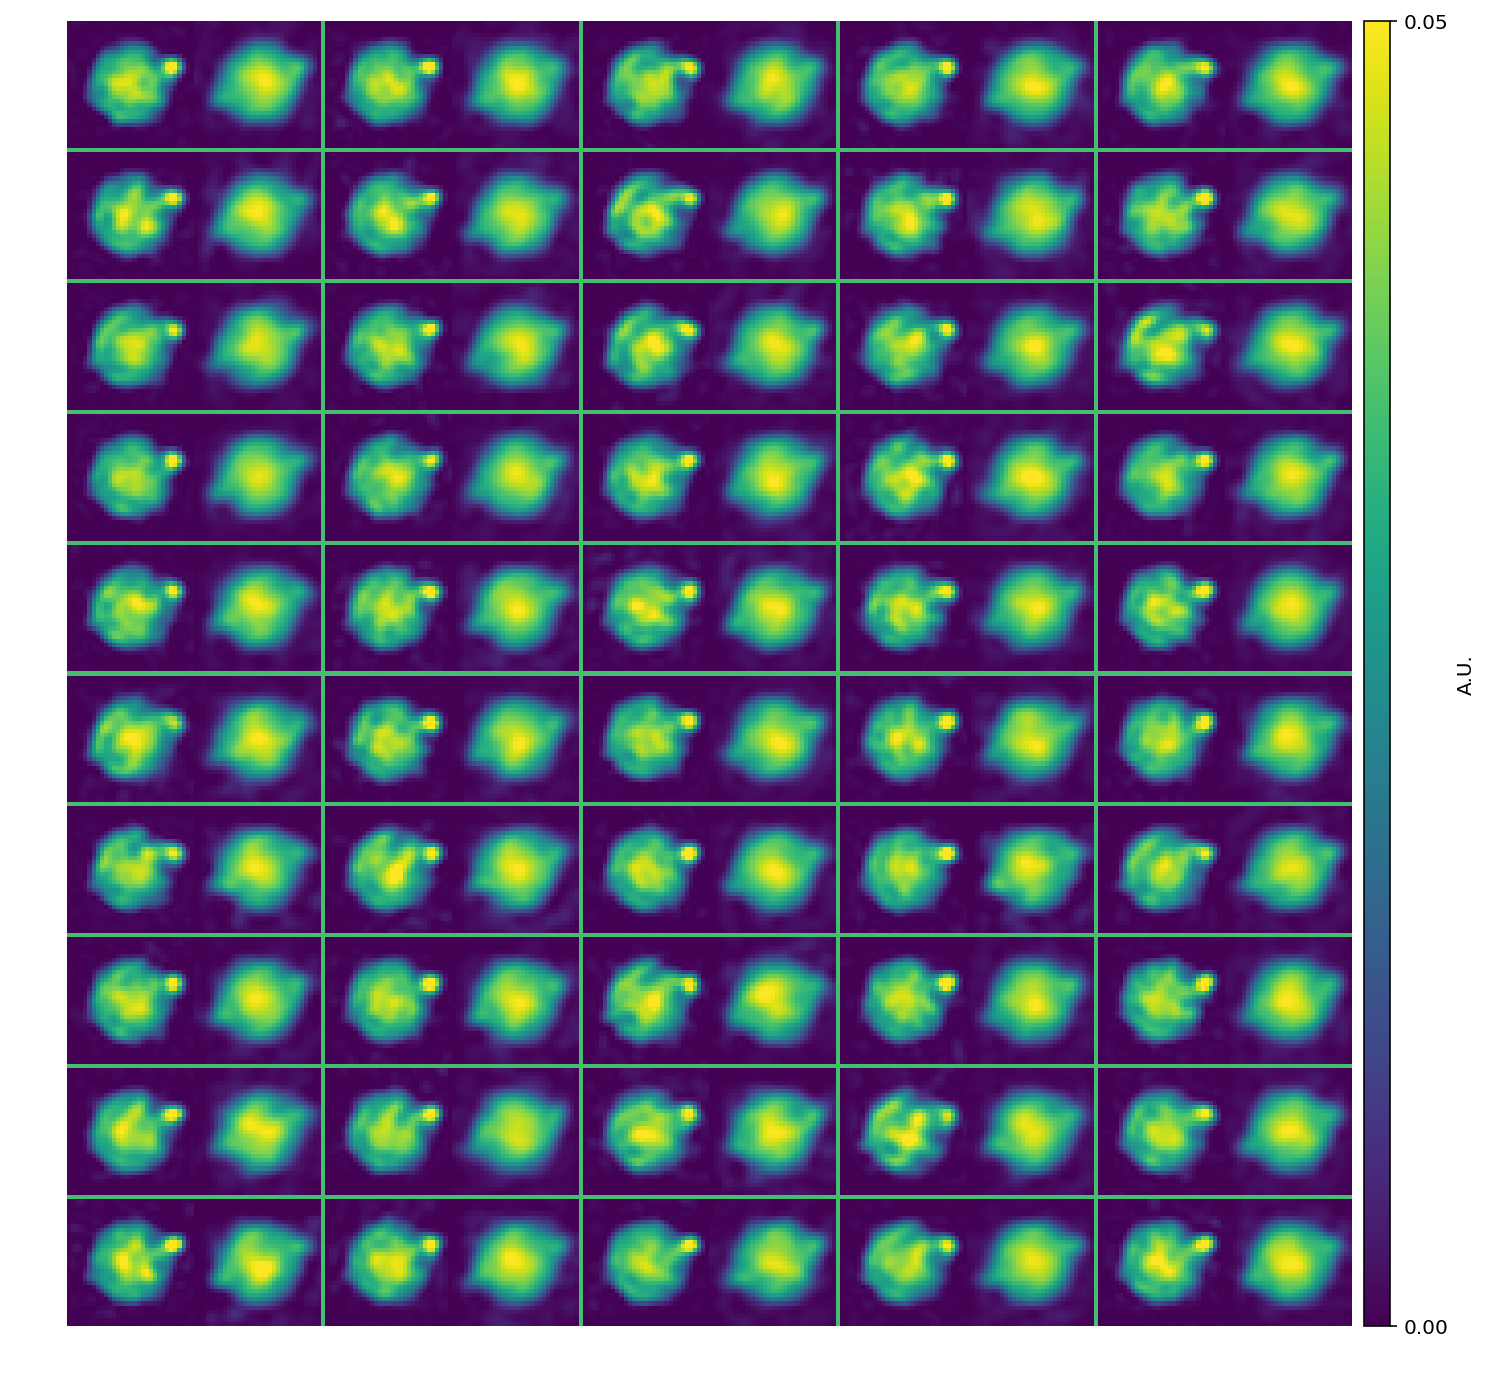

In [405]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
im = plt.imshow(mosaic, vmin = 0, vmax = 0.05, interpolation='Nearest')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad='1%', add_to_figure=True)
cbar = fig.colorbar(im, cax = cax, orientation='vertical', ticks = [0, 0.05])
cbar.set_label('A.U.')

plt.savefig('mosaic.pdf', bbox_inches='tight')


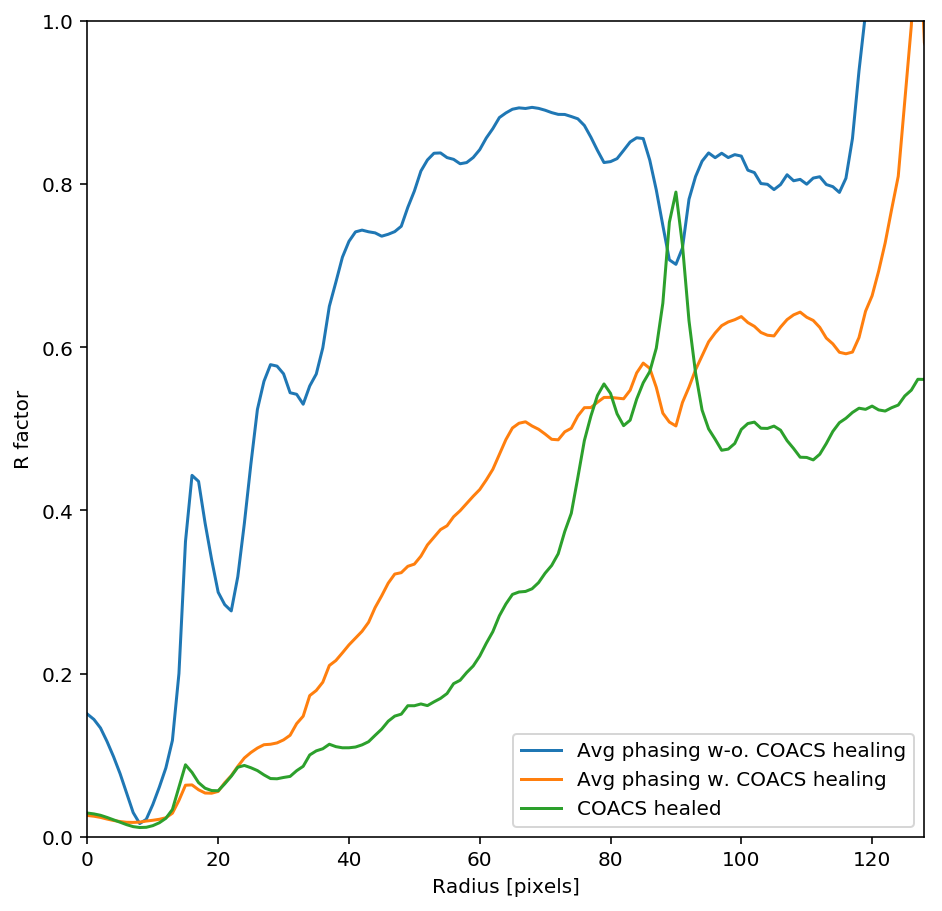

In [404]:
fig = plt.figure(figsize=(7.5,7.5))              
plt.gca().set_xlim([0,128])
plt.gca().set_ylim([0,1])

plt.plot(rs72rsum)
plt.plot(vs72rsum)
plt.plot(vsrsum)
plt.xlabel('Radius [pixels]')
plt.ylabel('R factor')
plt.legend(['Avg phasing w-o. COACS healing', 'Avg phasing w. COACS healing', 'COACS healed'])

plt.savefig('Rfactors.pdf', bbox_inches='tight')

In [407]:
numpy.mean((vsR, vs72R, rs72R), axis=1)

array([0.09787502, 0.15775181, 0.41576951])

In [408]:
numpy.std((vsR, vs72R, rs72R), axis=1)

array([0.0053552 , 0.01944789, 0.01737122])